## [sklearn-theano](http://sklearn-theano.github.io/install.html)
1. sklearn-theano is a [sklearn related projects](http://scikit-learn.org/dev/related_projects.html) that wraps certain deep learning models such as theano-based, overfeat or googleLeNet
2. It can be used to extract image features that are related to transformation, localization and classification
3. So far the package has not had a lot of focus on wrapping Theano yet, but it useful in utilizing existing frameworks and pre-trained weights to extract information from images, like shown in this notebook

### [installation](http://sklearn-theano.github.io/install.html)

###[examples](http://sklearn-theano.github.io/auto_examples/index.html)

### Currently sklean-theano focuses on three main aspects of image-related information retrival

1. access cifar and mnist data via generative networks
2. detect and localize bound-box (or irregular shape bound) pre-defined object classes in an image
3. directly classify an image into pre-defined classes
4. extract features of an image or patch via transformers
5. extract weights from different nn layers directly
6. There are currently two types of classifiers and transformers (feature extractors): Overfeat and GoogleLeNet
7. There are currently one type of localizer: Overfeat, but since both classifier interface also supports bounds, so their classifier can be used to localize

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
from sklearn_theano import datasets
from sklearn_theano import feature_extraction
import pandas as pd

Couldn't import dot_parser, loading of dot files will not be possible.


## access to images in public image sets (e.g. cifar, asirra, mnist)

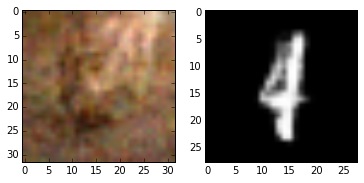

In [16]:
## cifar images
imgs = datasets.fetch_cifar_fully_connected_generated(n_samples = 10, )
fig, axes = plt.subplots(1, 2)
axes[0].imshow(imgs[0])
imgs = datasets.fetch_mnist_generated(n_samples=10)
axes[1].imshow(imgs[0], cmap = plt.cm.gray)

## find and bound known objects -- based on overfeats `localizer`

1. it can detect multiple types of things in an image at the same time
2. however for each type, it only detects one bounding box - this can be seen from many bears
3. image from http://1.bp.blogspot.com/-EXRWGSmjZEk/UoSJb8TodPI/AAAAAAAAAXU/oK7ShlR3eFY/s1600/free-picture-animal-motherly-love-animals_248957.jpg


In [2]:
print "# of overfeat predefined classes", len(feature_extraction.get_all_overfeat_labels())

# of overfeat predefined classes 1000


In [4]:
## to use the localizer, you need to know what you are looking for by providing match strings
bears = plt.imread("../data/images/many-bears.jpg")
bear_types = [t for t in feature_extraction.get_all_overfeat_labels() if 'bear' in t.lower()]
print bear_types
%time localizer = feature_extraction.OverfeatLocalizer(match_strings = bear_types)
%time detected_regions = localizer.predict(bears)

['lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens', 'brown bear, bruin, Ursus arctos', 'ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus', 'American black bear, black bear, Ursus americanus, Euarctos americanus', 'giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca', 'sloth bear, Melursus ursinus, Ursus ursinus', 'koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus', 'teddy, teddy bear', 'bearskin, busby, shako']
CPU times: user 434 ms, sys: 195 ms, total: 629 ms
Wall time: 630 ms
CPU times: user 1min 30s, sys: 305 ms, total: 1min 30s
Wall time: 1min 31s


(39, 2)
(261, 2)
(3, 2)
(106, 2)
(1, 2)
(42, 2)
(2, 2)
(7, 2)
(0, 2)


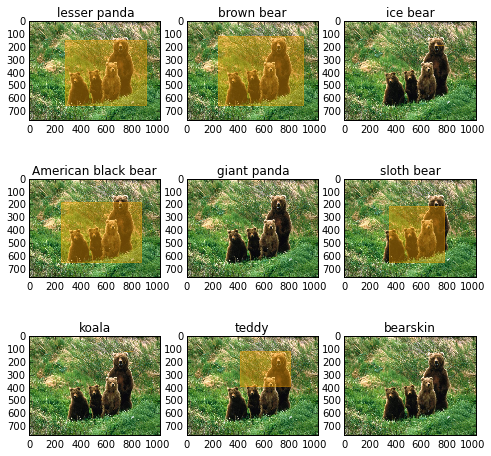

In [47]:
## base localization results and matplotlib.patches are using xy-wh instead of row-col system

fig, axes = plt.subplots(3, 3, figsize = (8, 8))
axes = axes.ravel()

for region,ax, t in zip(detected_regions, axes, bear_types):
    print region.shape
    ax.imshow(bears)
    ax.set_title(t.split(",")[0])
    if min(region.shape) < 1: continue
    left_upper = (region[:, 0].min(), region[:, 1].min())
    w = region[:, 0].max() - region[:, 0].min()
    h = region[:, 1].max() - region[:, 1].min()
    rect = patches.Rectangle(left_upper, w, h, alpha = 0.4, ec = 'orange', fc="orange")
    ax.add_patch(rect)

## localization of different object types
1. image source: http://cl.jroo.me/z3/z/5/h/e/a.baa-Dog-in-a-cowboy-hat.jpg

['English springer, English springer spaniel', 'Welsh springer spaniel', 'dalmatian, coach dog, carriage dog', 'Newfoundland, Newfoundland dog', 'Bernese mountain dog', 'Maltese dog, Maltese terrier, Maltese', 'clumber, clumber spaniel', 'Japanese spaniel', 'Greater Swiss Mountain dog', 'Irish water spaniel', 'affenpinscher, monkey pinscher, monkey dog', 'pug, pug-dog', 'Eskimo dog, husky', 'Brittany spaniel', 'Tibetan terrier, chrysanthemum dog', 'hippopotamus, hippo, river horse, Hippopotamus amphibius', 'Shetland sheepdog, Shetland sheep dog, Shetland', 'cocker spaniel, English cocker spaniel, cocker', 'Sussex spaniel', 'Blenheim spaniel', 'African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus', 'German shepherd, German shepherd dog, German police dog, alsatian', 'dogsled, dog sled, dog sleigh', 'horse cart, horse-cart', 'buckeye, horse chestnut, conker', 'axolotl, mud puppy, Ambystoma mexicanum', 'cowboy hat, ten-gallon hat', 'hotdog, hot dog, red hot'] 28
CPU times: user

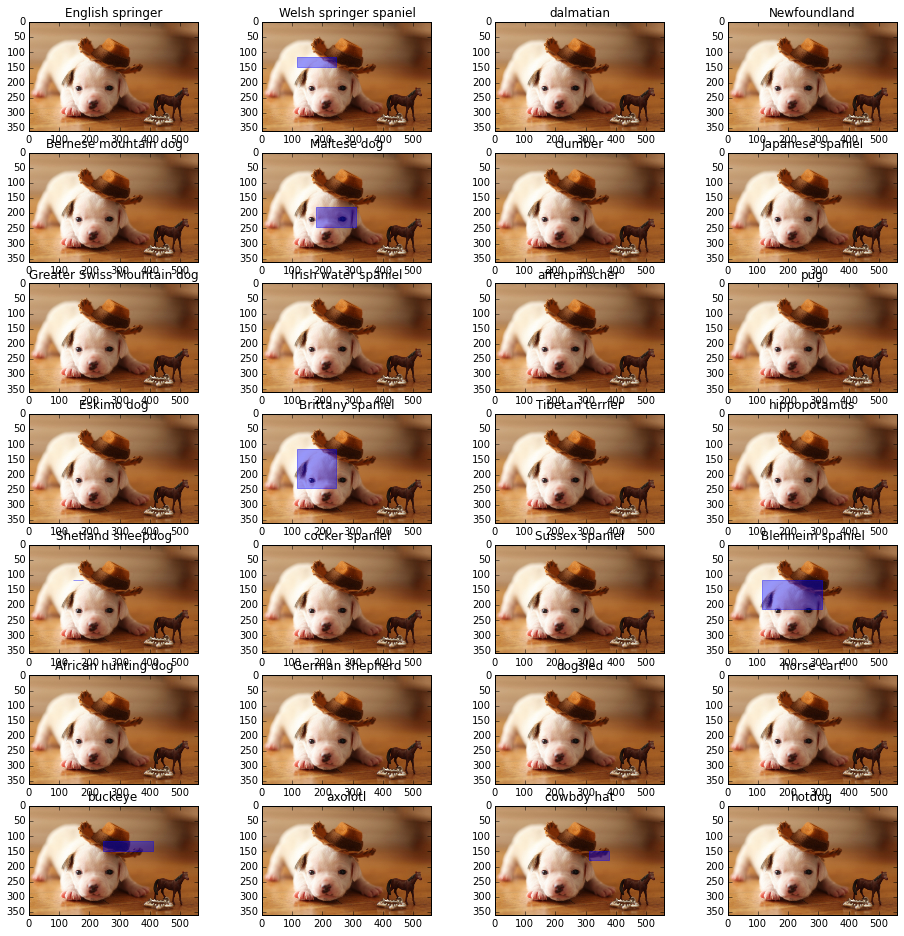

In [107]:
import re
dog_hat = plt.imread("../data/images/dog_hat.jpg")
dog_hat_types = [t for t in feature_extraction.get_all_overfeat_labels() 
                 if set([w.lower() for w in re.findall(r"\b\w+\b", t)]).intersection(["hat", "dog", "puppy", "horse", "spaniel"])]
print dog_hat_types, len(dog_hat_types)

%time localizer = feature_extraction.OverfeatLocalizer(match_strings = dog_hat_types)
%time detected_regions = localizer.predict(dog_hat)

fig, axes = plt.subplots(7, 4, figsize = (16, 16))
axes = axes.ravel()

for region,ax, t in zip(detected_regions, axes, dog_hat_types):
    ax.imshow(dog_hat)
    ax.set_title(t.split(",")[0])
    if min(region.shape) < 1: continue
    left_upper = (region[:, 0].min(), region[:, 1].min())
    w = region[:, 0].max() - region[:, 0].min()
    h = region[:, 1].max() - region[:, 1].min()
    rect = patches.Rectangle(left_upper, w, h, alpha = 0.4, ec = 'blue', fc="blue")
    ax.add_patch(rect)

***You can query and localize things with wordnet synsets - either overfeat labels or wordnet leaves***

In [119]:
len(feature_extraction.get_all_overfeat_leaves())

2092

CPU times: user 398 ms, sys: 182 ms, total: 580 ms
Wall time: 580 ms
CPU times: user 21.6 s, sys: 166 ms, total: 21.8 s
Wall time: 21.8 s


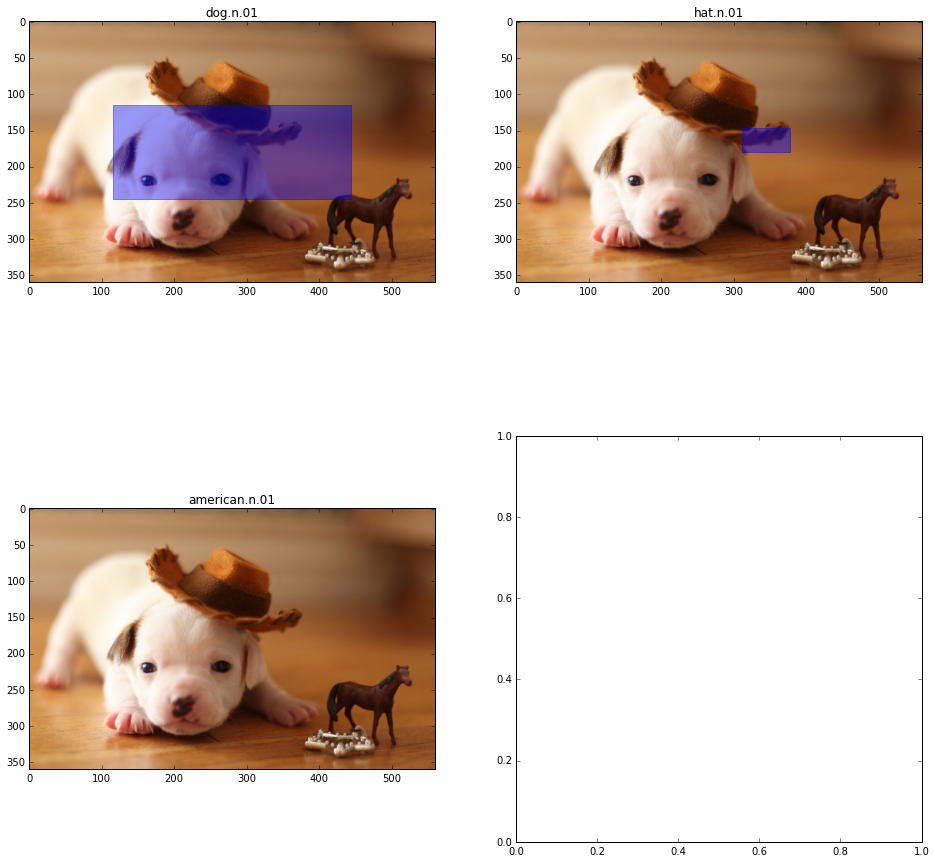

In [126]:
query = ["dog.n.01", "hat.n.01", "american.n.01"]

%time localizer = feature_extraction.OverfeatLocalizer(match_strings = query)
%time detected_regions = localizer.predict(dog_hat)

fig, axes = plt.subplots(2, 2, figsize = (16, 16))
axes = axes.ravel()

for region,ax,q in zip(detected_regions, axes, query):
    ax.imshow(dog_hat)
    ax.set_title(q)
    if min(region.shape) < 1: continue
    left_upper = (region[:, 0].min(), region[:, 1].min())
    w = region[:, 0].max() - region[:, 0].min()
    h = region[:, 1].max() - region[:, 1].min()
    rect = patches.Rectangle(left_upper, w, h, alpha = 0.4, ec = 'blue', fc="blue")
    ax.add_patch(rect)

## classification by overfeat and/or googleLeNet
1. both overfeat and googlrLeNet classifier has the localization result as well (in its `crop_bounds_`)
2. googlrLeNet seems to be faster with similiar accuracy

In [79]:
%time of_clf = feature_extraction.OverfeatClassifier(top_n = 5)
%time gl_clf = feature_extraction.GoogLeNetClassifier(top_n = 5)

CPU times: user 10.3 s, sys: 23.4 ms, total: 10.4 s
Wall time: 10.4 s
CPU times: user 4.53 s, sys: 11.6 ms, total: 4.55 s
Wall time: 4.55 s


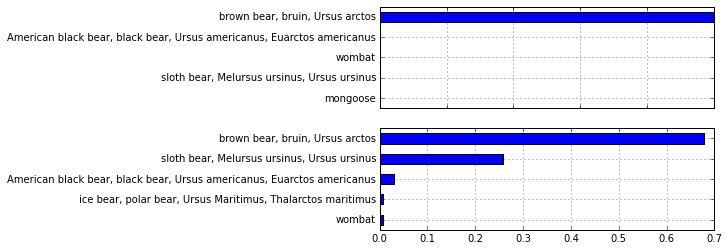

In [85]:
%time of_predictions = pd.Series(of_clf.predict_proba(bears).ravel(), index = of_clf.predict(bears).ravel())
%time gl_predictions = pd.Series(gl_clf.predict_proba(bears).ravel(), index = gl_clf.predict(bears).ravel())
fig, axes = plt.subplots(2, 1)
of_predictions.plot(kind = "barh", ax = axes[0])
gl_predictions.plot(kind = "barh", ax = axes[1])

CPU times: user 11.2 s, sys: 55.6 ms, total: 11.2 s
Wall time: 11.2 s
CPU times: user 4.88 s, sys: 27.2 ms, total: 4.9 s
Wall time: 4.91 s


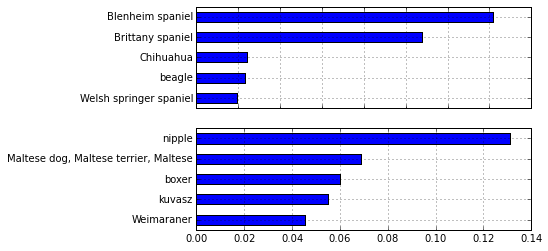

In [101]:
%time of_predictions = pd.Series(of_clf.predict_proba(dog_hat).ravel(), index = of_clf.predict(dog_hat).ravel())
%time gl_predictions = pd.Series(gl_clf.predict_proba(dog_hat).ravel(), index = gl_clf.predict(dog_hat).ravel())
fig, axes = plt.subplots(2, 1)
of_predictions.plot(kind = "barh", ax = axes[0])
gl_predictions.plot(kind = "barh", ax = axes[1])

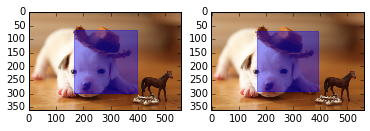

In [105]:
fig, axes = plt.subplots(1, 2, figsize = (6, 3))

axes[0].imshow(dog_hat)
bnd = of_clf.crop_bounds_
xy = (bnd[0], bnd[2])
w = bnd[1]-bnd[0]
h = bnd[3]-bnd[2]
axes[0].add_patch(patches.Rectangle(xy, w, h, ec="blue", fc="blue", alpha = 0.4))

axes[1].imshow(dog_hat)
bnd = gl_clf.crop_bounds_
xy = (bnd[0], bnd[2])
w = bnd[1]-bnd[0]
h = bnd[3]-bnd[2]
axes[1].add_patch(patches.Rectangle(xy, w, h, ec="blue", fc="blue", alpha = 0.4))

## Use transformer to extract features - very slow compared to DeCafe (because of lack of multicore support?)

In [164]:
import cPickle
(train_X, train_y), (valid_X, valid_y), (test_X, test_y) = cPickle.load(open("../data/mnist.pkl"))

of_transformer = feature_extraction.OverfeatTransformer(output_layers=[-3])
#gl_transformer = feature_extraction.GoogLeNetTransformer()
%time of_feats = of_transformer.fit_transform(bears)
#%time gl_feats = gl_transformer.fit_transform(bears, )

CPU times: user 1min 14s, sys: 275 ms, total: 1min 15s
Wall time: 1min 15s


In [165]:
of_feats.shape

(1, 1305600)

#### TODO - to show a useful classification case

## Find irregular shaped segment
1. **THERE IS A STRONG ASSUMPTION ABOUT IMAGE SIZE WHEN USING LOCALIZER, OR TRANSFORMER/CLASSIFIER - the images will be windowed by either 221x221 or 231x231, so any images with sizes smaller than that will NOT be handled **

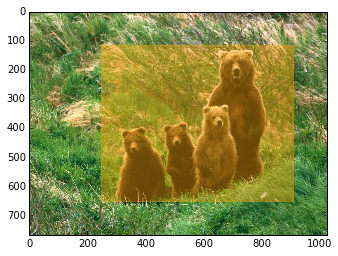

In [6]:
## find the regular rectangle bound - the single best

fig, ax = plt.subplots(1, 1)
ax.imshow(bears)
localizer = feature_extraction.OverfeatLocalizer(match_strings = ["bear.n.01"])
region = localizer.predict(bears)[0]
xy = (region[:, 0].min(), region[:, 1].min())
w = region[:, 0].max() - region[:, 0].min()
h = region[:, 1].max() - region[:, 1].min()
ax.add_patch(patches.Rectangle(xy, w, h, color = "orange", alpha = 0.4))

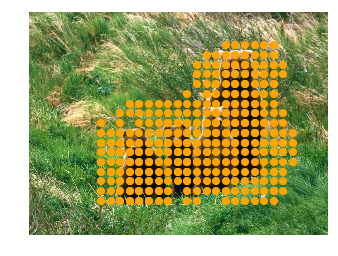

In [5]:
## find the irregular segment of object by sliding a window
## it is implemented in Overfeat, so you dont have to do anything explicitly
fig, ax = plt.subplots(1, 1)

label = "bear.n.01"
clf = feature_extraction.OverfeatLocalizer(match_strings=[label])
points = clf.predict(bears)[0]
ax.imshow(bears)
ax.axis('off')
ax.autoscale(enable=False)
ax.scatter(points[:, 0], points[:, 1], color='orange',
                    s=50)